In [ ]:
pip install pandas_ta   #installing pandas technical analysis library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 3.8 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=9430a26a28346dd3a805dc755c98783edfaacb8b586ec03cb406614398303331
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [ ]:
import numpy as np
import pandas as pd
from termcolor import colored as cl
import matplotlib.pyplot as pl

# for importing csv datasets from Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')
 
%matplotlib inline

data = pd.read_csv('/content/gdrive/MyDrive/Capstone/nifty50/TCS_3.csv') #data for stock price.
history = pd.DataFrame(data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Indicator 1: Relative Strength Index

gain = []   #to store gain% for each day, if loss occurs -> gain = 0%
loss = []   # to store loss% for each day, if gain occurs -> loss = 0%
prev_close = list(history["Prev Close"])
close_price = list(history["Close"])
n = len(prev_close)
RSI = []
RSI_SCORE = []
for i in range(n):
  percent = ((close_price[i] - prev_close[i])/prev_close[i])*100 
  if(percent>0):
    gain.append(percent)
    loss.append(0)
  else:
    gain.append(0)
    loss.append(percent)
  
  if(i>13): #since 14 day period for RSI.
    loss.pop(0)  #removing the first day, to add the 15th day.
    gain.pop(0)
    #RSI Indicator value calculations: Requirements => average gain and loss (14 day period)
    avg_gain = 0
    avg_loss = 0
    for i in range(len(gain)):
      avg_gain += gain[i]
      avg_loss += loss[i]
    avg_gain /= len(gain) 
    avg_loss /= len(loss)
    
    rsi = round(100 - (100/(1+avg_gain/abs(avg_loss))))
    RSI.append(rsi)
    #Score for RSI for the stock(out of 10) RSI 70 => overbought, RSI 30 => oversold
    if(rsi>70):
      rsi_score = 0
    elif(rsi<30):
      rsi_score = 10
    else:
      rsi_score = round((70-rsi)*0.25,2)   #since 40 range gives point from 0 to 10.
    RSI_SCORE.append(rsi_score)
print(RSI)
print(RSI_SCORE)


[29, 18, 24, 19, 20, 25, 15, 16, 23, 28, 29, 27, 24, 27, 31, 34, 31, 41, 47, 46, 68, 64, 60, 52, 52, 65, 76, 71, 71, 83, 84, 84, 83, 81, 76, 83, 81, 85, 82, 79, 78, 73, 73, 52, 55, 55, 64, 65, 73, 65, 68]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9.75, 9.0, 9.75, 7.25, 5.75, 6.0, 0.5, 1.5, 2.5, 4.5, 4.5, 1.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.5, 3.75, 3.75, 1.5, 1.25, 0, 1.25, 0.5]


In [ ]:
#Custom Super Technical Indicator

import pandas_ta as ta

CustomStrategy = ta.Strategy(
    name = "TechScore",
    description = "To be used to get technical analysis score of the stock",
    ta = [
        {"kind": "sma", "length": 50},  #simple moving average for 50/200 days.
        {"kind": "sma", "length": 200},
        {"kind": "adx", "window": 14}, #average directional index for 14 days, provides value for plus/minus directional indicator in seeperate columns.
        {"kind": "macd", "window_fast": 26, "window_slow": 14, "window_sign": 9}, #MACD indicator with commonly used vars 26/12/9 days.
        {"kind": "rsi", "window": 14},  #relative strength index over 14 days period
        {"kind": "bbands", "window": 20, "window_dev": 2}, #bollinger bands calculation over 20 days period with standard deviation of 2 days.
        {"kind": "stoch", "window": 14, "smooth_window": 3},   #stochastic indicator over 14days with 3 days smoothing
        {"kind": "psar", "step": 0.02, "max_step": 0.2}  #parabolic stop and reverse indicator, tells about current trend.

    ]
)
history.ta.strategy(CustomStrategy)

history.to_csv('output.csv',index=False) 
! cat output.csv



Symbol,Series,Date,Prev Close,Open Price,High,Low,Last Price,Close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,SMA_50,ADX_14,DMP_14,DMN_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHk_14_3_3,STOCHd_14_3_3,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
TCS,EQ,05-Sep-22,3130.4,3123.65,3147.95,3112.25,3140.0,3133.4,3135.2,2147912,6734130930.0,108628,1483879,69.08,,,,,,,,,,,,,,,,,,0.02,0
TCS,EQ,06-Sep-22,3133.4,3135.5,3140.85,3106.35,3127.0,3127.05,3123.4,1936453,6048310102.0,130549,1251306,64.62,,,,,,,,,,,,,,,,,3468.9,0.04,0
TCS,EQ,07-Sep-22,3127.05,3102.0,3161.9,3102.0,3153.0,3149.6,3135.29,1291534,4049333273.0,89078,555995,43.05,,,,,,,,,,,,,,,,,3454.398,0.06,0
TCS,EQ,08-Sep-22,3149.6,3170.0,3183.5,3160.1,3164.4,3169.65,3169.6,1346113,4266640132.0,68717,795911,59.13,,,,,,,,,,,,,,,,,3433.25412,0.06,0
TCS,EQ,09-Sep-22,3169.65,3195.0,3233.5,3168.5,3220.0,3217.65,32

<ipython-input-66-55120e281462>:187: RuntimeWarning: divide by zero encountered in double_scalars
  percent = ((price[i]-invested[0])*100)/invested[0]


Profit|Qty: 532.4500000000007 2


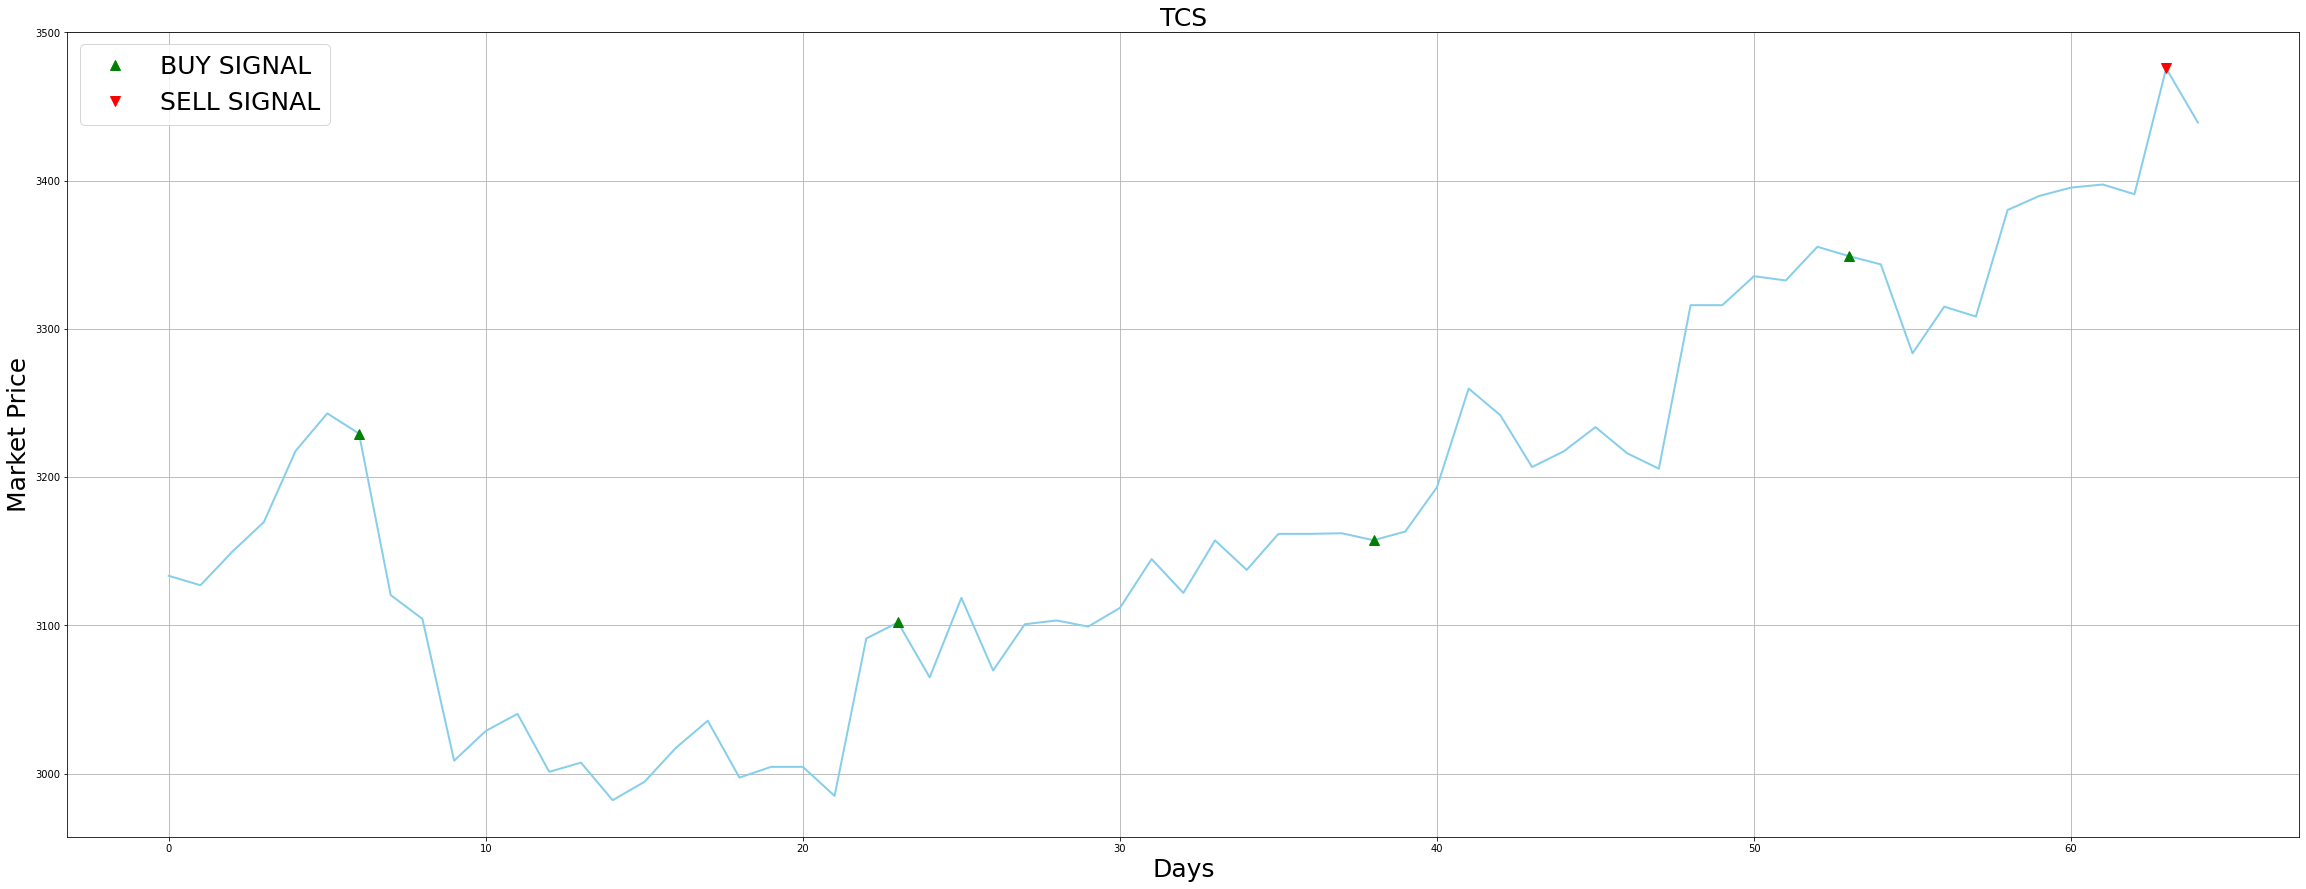

In [ ]:
#Functions to calculate technical score of the stock using combined score of major technical indicators

import math
import numpy
import matplotlib.pyplot as plt


buy_signal = [0 for i in range(len(history["Close"]))]
sell_signal = [0 for i in range(len(history["Close"]))]

def sma_score(status):
  buy_gap = 15  #gap between trade days
  sell_gap = 15
  sma50 = history["SMA_50"]   
  sma200 = history["SMA_200"]
  price = history["Prev Close"]
  range1 = price-sma50
  range2 = price-sma200
  for i in range(len(range1)):
    if((range1[i]/price[i])*100>=-1 and (range1[i]/price[i])*100<1 and sma50[i]>sma200[i] and status<5 and buy_gap>14): #near SMA 50 days(buy)
      buy_signal[i]+=1
      status+=1
      buy_gap = 0
    elif((range2[i]/price[i])*100>=-1 and (range2[i]/price[i])*100<1 and sma50[i]>sma200[i] and status<5 and buy_gap>14): #near SMA 200 days(buy)
      buy_signal[i]+=1
      status+=1
      buy_gap = 0
    buy_gap+=1
    sell_gap+=1
  return


def rsi_score(status):
  buy_gap = 15
  sell_gap = 15
  rsi = history["RSI_14"]
  for i in range(len(rsi)):
    if(rsi[i]<35 and status<5 and buy_gap>14):
      buy_signal[i]+=1
      status += 1  #bought stock
      buy_gap = 0
    elif(rsi[i]>65 and status>0 and sell_gap>14):
      sell_signal[i]+=1
      sell_gap = 0
      if(status>=4):
        status = 2  #sold half position
      else:
        status = 0  #sold complete stock
    buy_gap+=1
    sell_gap+=1
  return

def macd_score(status):
  macd = history["MACDh_12_26_9"]
  for i in range(1,len(macd)):
    if(macd[i-1]<0 and macd[i]>0 and status<5):  #buy signal
      buy_signal[i]+=1
      status+=1
    elif(macd[i-1]>0 and macd[i]<0 and status>0):    #sell signal
      sell_signal[i]+=1
      if(status>=4):
        status = 2  #sold half position
      else:
        status = 0  #sold complete stock
  return

def stochastic_score(status):
  buy_gap = 15
  sell_gap = 15
  stoch = history["STOCHd_14_3_3"]
  for i in range(len(stoch)):
    if(stoch[i]<20 and status<5 and buy_gap>14):
      buy_signal[i]+=1
      status+=1
      buy_gap = 0
    elif(stoch[i]>80 and status>0 and sell_gap>14):
      sell_signal[i]+=1
      sell_gap = 0
      if(status>=4):
        status = 2
      else:
        status = 0
    sell_gap+=1
    buy_gap+=1
  return
  
def bbands_score(status):
  buy_gap = 15
  sell_gap = 15
  bbands_upper = history["BBU_5_2.0"]
  bbands_lower = history["BBL_5_2.0"]
  bbands_avg = history["BBM_5_2.0"]
  price = history["Close"]
  high = history["High"]
  low = history["Low"]
  for i in range(len(price)):
    if(high[i]<bbands_upper[i] and price[i]>bbands_avg[i] and status<5 and buy_gap>14):
      buy_signal[i]+=1
      status+=1
      buy_gap = 0
    elif(low[i]>bbands_lower[i] and price[i]<bbands_avg[i] and status>0 and sell_gap>14):
      sell_signal[i]+=1
      if(status>=4):
        status = 2
      else:
        status = 0
      sell_gap = 0
    buy_gap+=1
    sell_gap+=1
  return

def psar_score(status):   
  psar_buy = history["PSARl_0.02_0.2"]
  psar_sell = history["PSARs_0.02_0.2"]
  signal = history["PSARr_0.02_0.2"]
  sma = history["SMA_50"]
  price = history["Close"]
  for i in range(len(signal)):
    if(signal[i]==1): #psar indicator generates a signal
      if(math.isnan(psar_buy[i])==False):
        if(sma[i]<=price[i] and status<5):   #double confirmation of longer trends
          buy_signal[i]+=1
          status+=1        
      elif(status>0):   #sell trend
        sell_signal[i]+=1
        if(status>=4):
          status = 2  #sold half position
        else:
          status = 0  #sold complete holding       
  return

def adx_score(status):
  adx = history["ADX_14"]
  d_negative = history["DMN_14"]
  d_positive = history["DMP_14"]
  for i in range(1,len(adx)):   #strong trend
    if(adx[i]>=25):
      if(d_positive[i]>d_negative[i] and d_positive[i-1]<d_negative[i-1] and status<5):    #buy
        buy_signal[i]+=1
        status+=1
      elif(d_positive[i]<d_negative[i] and d_positive[i-1]>d_negative[i-1] and status>0):    #sell
        sell_signal[i]+=1
        if(status>=4):
          status = 2  #sold half position
        else:
          status = 0  #sold complete holding
    elif(adx[i]<20):   #trendless
      continue
  return

def get_techscore():
  score = []

  status = 0 #buy or sell position
  
  #sma = sma_score(status)
  rsi = rsi_score(status)
  macd = macd_score(status)
  stoch = stochastic_score(status)
  bbands = bbands_score(status)
  adx = adx_score(status)
  psar = psar_score(status)
  price = history["Close"]
  plot_graph(price,score)
  

def plot_graph(price,score):
  buy_price = []
  sell_price = []
  qty = 0
  buy_gap = 15
  sell_gap = 15
  invested = [0,0]
  profit = 0
  for i in range(len(price)):
    if(sell_signal[i]==0 and buy_signal[i]>0 and buy_gap>14 and invested[1]<5):
      buy_price.append(price[i])
      qty = invested[1]+1
      buy_gap = 0
      buy_avg = (invested[0]*invested[1]+price[i])/qty
      invested = [buy_avg,qty] 
    else:
      buy_price.append(0)
    buy_gap+=1

    #print(invested[0],price[i],invested[0])
    percent = ((price[i]-invested[0])*100)/invested[0]
    if(buy_signal[i]==0 and percent>=7.5 and invested[1]>0 and sell_gap>14):
      sell_price.append(price[i])
      qty = invested[1]
      investment = invested[0]*qty
      if(qty>1):
        sold_qty = qty//2
      else:
        sold_qty = 1
      qty = qty-sold_qty
      sell_gap = 0
      profit = profit+((price[i]-invested[0])*sold_qty)
      if(qty==0):
        buy_avg = 0
      else:
        buy_avg =  (investment-invested[0]*sold_qty)/qty
      invested = [buy_avg,qty]
    else:
      sell_price.append(0)
    sell_gap+=1
  print("Profit|Qty:",profit,invested[1])

  plt.rcParams["figure.figsize"] = (40,24)

  buy_price = np.array(buy_price, dtype=np.double)
  buy_price[ buy_price==0 ] = np.nan
  sell_price = np.array(sell_price, dtype=np.double)
  sell_price[ sell_price==0 ] = np.nan   
  ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
  ax1.plot(price, color = 'skyblue', linewidth = 2)
  ax1.plot(buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
  ax1.plot(sell_price, marker = 'v', color = 'red', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
  plt.title('TCS', fontsize = 25)
  plt.xlabel('Days', fontsize = 25)
  plt.ylabel('Market Price', fontsize = 25)
  plt.legend(prop={'size': 25})
  plt.grid()
  plt.show()



get_techscore()